In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

##### Baird's DP Counter-example

In [2]:

class DP_Baird:
    def __init__(self):
        self.alpha = 0.01
        self.epsilon = 0.01
        self.gamma = 0.99

        # x is the feature set for each state
        self.x = np.array([
                [0, 0, 0, 0, 0, 0, 0],
                [1, 2, 0, 0, 0, 0, 0],
                [1, 0, 2, 0, 0, 0, 0],
                [1, 0, 0, 2, 0, 0, 0],
                [1, 0, 0, 0, 2, 0, 0],
                [1, 0, 0, 0, 0, 2, 0],
                [2, 0, 0, 0, 0, 0, 1]
            ])

        # v is the value function, v = w * x
        self.v = np.zeros((7))
        # w is the weight for each feature in x
        self.w = np.array([1., 1., 1., 1., 1., 10., 1.])
        # delta_w is w after the gradient updated
        self.delta_w = self.w.copy()
        
    def dp_update(self):
        """
        Update V using the dynamic programming update for Baird's counterexample
        https://webdocs.cs.ualberta.ca/~sutton/book/ebook/node90.html
        """
        self.delta_w *= 0
        # the approximation of the value function is linear
        self.v = self.x.dot(self.w)

        # obtain the DP updates for w for states 1-5
        for i in range(1, 6):
            # for states 1-5, you automatically wind up in state 6
            alpha_error = self.alpha * (self.gamma * self.v[6] - self.v[i])
            self.delta_w += alpha_error * self.x[i]

        # add the transitions from state 6 to the DP updates
        for i in range(7):
            # with epsilon probability you go to the terminal state
            alpha_error1 = self.alpha * self.epsilon * (0 - self.v[6])
            # with (1 - epsilon) probability you wind up in v[6]
            alpha_error2 = self.alpha * (1 - self.epsilon) * (self.gamma * self.v[6] - self.v[6])
            self.delta_w[i] += alpha_error1 * self.x[6, i]
            self.delta_w[i] += alpha_error2 * self.x[6, i]

        self.w += self.delta_w
        return self.w.copy()




In [3]:
dp_baird = DP_Baird()

w_array = np.array([dp_baird.dp_update() for i in range(10000)])

In [4]:
for idx, w in enumerate(w_array):
    w_array[idx] = [np.log10(ww) if ww > 0 else -np.log10(-ww + 1) for ww in w]



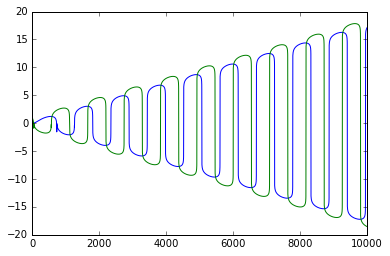

In [5]:
plt.plot(w_array[:, 6])
plt.plot(w_array[:, 5])